<a href="https://colab.research.google.com/github/Jhonsilvaa/previsao-de-churn-com-machine-learning/blob/main/Previs%C3%A3o_de_Churn_com_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Churn com Machine Learning
---

O churn rate, ou simplesmente churn, é uma métrica que representa a taxa de evasão da sua base de clientes. Em outras palavras, ele indica quantos clientes cancelaram seus serviços em relação ao número total de clientes ativos em um determinado período de tempo. Essa métrica é especialmente importante para empresas que oferecem serviços por assinatura, como é o caso da Spotify e da Netflix.

Em serviços como esses, o churn rate representa a taxa de cancelamento de assinaturas por parte dos usuários. Isso é relevante,porque em modelos de negócio baseados em assinaturas, a receita da empresa depende diretamente do número de clientes ativos. Se muitos clientes cancelam suas assinaturas, a empresa pode sofrer uma queda na receita e no crescimento do negócio.

<p align=center>
<img src="https://t4.ftcdn.net/jpg/00/10/96/53/360_F_10965318_PRRHOB8Wxbp8RCQx0jyhaUxlKZCuxJpC.jpg" width="70%"></p>

**Churn** também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

Neste projeto, o objetivo é criar um modelo que seja capaz de identificar com os clientes que têm maior probabilidade de cancelar seus serviços. Isso permitirá que a empresa adote estratégias proativas para reter esses clientes, reduzindo assim a taxa de churn e aumentando a satisfação do cliente. Além disso, a análise dos dados de churn pode fornecer insights valiosos sobre as causas subjacentes da perda de clientes, permitindo que a empresa tome medidas para melhorar seus produtos, serviços ou processos de atendimento ao cliente.

## Descrição de Variáveis
Um guia que fornece descrições conceituais de cada variável em nosso conjunto de dados.




* `customerID`: Identificação única do cliente.

* `gender`: Gênero do cliente (masculino/feminino)

* `SeniorCitizen`: Indica se o cliente é um idoso ou não (0 - não, 1 - sim)

* `Partner`: Indica se o cliente tem um parceiro (cônjuge ou companheiro) ou não (Yes - sim, No - não)

* `Dependents`: Indica se o cliente tem dependentes (filhos ou outros dependentes financeiros) ou não (Yes - sim, No - não)

* `tenure`: Tempo em meses que o cliente permaneceu na empresa de telecomunicações.

* `PhoneService`: indica se o cliente tem serviço de telefone ou não (Yes - sim, No - não)

* `MultipleLines`: indica se o cliente tem múltiplas linhas telefônicas ou não (Yes - sim, No - não, No phone service - sem serviço de telefone)

* `InternetService`: indica o tipo de serviço de internet do cliente (DSL, Fiber optic, No - sem serviço de internet)

* `OnlineSecurity`: indica se o cliente tem serviço de segurança online ou não (Yes - sim, No - não, No internet service - sem serviço de internet)

* `OnlineBackup`: indica se o cliente tem serviço de backup online ou não (Yes - sim, No - não, No internet service - sem serviço de internet)

* `DeviceProtection`: indica se o cliente tem serviço de proteção de dispositivo ou não (Yes - sim, No - não, No internet service - sem serviço de internet)

* `TechSupport`: indica se o cliente tem suporte técnico ou não (Yes - sim, No - não, No internet service - sem serviço de internet)

* `StreamingTV`: indica se o cliente tem serviço de streaming de TV ou não (Yes - sim, No - não, No internet service - sem serviço de internet)

* `StreamingMovies`: indica se o cliente tem serviço de streaming de filmes ou não (Yes - sim, No - não, No internet service - sem serviço de internet)

* `Contract`: tipo de contrato do cliente (Month-to-month - mensal, One year - anual, Two year - bianual)

* `PaperlessBilling`: indica se o cliente tem fatura digital ou não (Yes - sim, No - não)

* `PaymentMethod`: método de pagamento do cliente (Electronic check - cheque eletrônico, Mailed check - cheque enviado pelo correio, Bank transfer (automatic) - transferência bancária automática, Credit card (automatic) cartão de crédito automático)

* `MonthlyCharges`: valor mensal cobrado do cliente.

* `TotalCharges`: valor total cobrado do cliente durante seu tempo na empresa de telecomunicações.

* `Churn`: indica se o cliente cancelou o serviço ou não (Yes - sim, No - não)

## Importando os Dados

 A importação de dados é o processo de carregamento e leitura de dados em um notebook. Os aspectos que devem ser consideradas na importação de dados são formatos de dados e locais de armazenamento de arquivos de conjuntos de dados. Existem vários formatos de dados que podem ser importados para notebooks, como .csv, .xlsx, .json e assim por diante. Para locais de armazenamento, existem duas opções, nomeadamente a partir de um computador local ou da internet, por meio de um link. Uma importação adequada garante que os dados sejam lidos corretamente e estejam prontos para as etapas seguintes.

In [ ]:
!pip install great_tables scikit-posthocs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from rich.console import Console
from rich.panel import Panel
from rich.table import Table
from scipy.stats import t, sem,shapiro, normaltest, kruskal
from great_tables import GT, style, loc
import scikit_posthocs as sp
from rich import print as rprint

* Os dados empregados neste projeto foram originariamente disponibilizados na plataforma de ensino da [IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#) e dizem respeito a um problema típico enfrentado por empresas de telecomunicações. O conjunto de dados completo pode ser encontrado em neste [link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

<p align=center>
<img src="https://cdn.freebiesupply.com/logos/thumbs/2x/ibm-logo.png" width="18%"></p>

* Embora não haja informações explícitas disponíveis, os nomes das colunas fornecem pistas sobre o problema em questão.

In [ ]:
from warnings import simplefilter, filterwarnings
simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
df_churn = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_churn.index = np.arange(1, len(df_churn)+1)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise exploratória de dados
Com os dados devidamente coletados, a próxima etapa é a análise exploratória de dados. Nessa etapa, empregamos diversas técnicas e ferramentas para entender melhor os dados coletados, identificando possíveis anomalias, relacionamentos e tendências nos dados.

* Antes de iniciar a análise dos dados, vamos verificar o nosso dataset, analisando as 5 primeiras entradas.

In [ ]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **1. Qual é a natureza do conjunto de dados?**

Durante a etapa de análise exploratória de dados, o primeiro passo é a compreensão do conjunto de dados em questão, isto é, seu tamanho, a porcentagem de valores ausentes e os tipos de variáveis. O tamanho do conjunto serve para avaliar sua amplitude e, por consequência, sua complexidade. A porcentagem de dados ausentes serve como um parâmetro para medir a quantidade de informações faltantes em comparação ao total do conjunto de dados. Por sua vez, os tipos de variáveis revelam a natureza dos dados.

In [ ]:
table =  Table(title='Informações das Variáveis')
table.add_column('Variable_name', justify='center')
table.add_column('Data_type', justify='center')
table.add_column('Unique_value', justify='center')
table.add_column('Missing_percentage', justify='center')
for column in df_churn.columns:
  table.add_row(f'{column}', f'{df_churn[column].dtypes}',
                f'{len(df_churn[column].unique())}',
                f'{(df_churn[column].isnull().sum())*100}')

print("Entradas:\t {}".format(df_churn.shape[0]))
print("Variáveis:\t {}\n".format(df_churn.shape[1]))
rprint(table)

Entradas:	 7043
Variáveis:	 21



                     Informações das Variáveis                      
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃  Variable_name   ┃ Data_type ┃ Unique_value ┃ Missing_percentage ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│    customerID    │  object   │     7043     │         0          │
│      gender      │  object   │      2       │         0          │
│  SeniorCitizen   │   int64   │      2       │         0          │
│     Partner      │  object   │      2       │         0          │
│    Dependents    │  object   │      2       │         0          │
│      tenure      │   int64   │      73      │         0          │
│   PhoneService   │  object   │      2       │         0          │
│  MultipleLines   │  object   │      3       │         0          │
│ InternetService  │  object   │      3       │         0          │
│  OnlineSecurity  │  object   │      3       │         0          │
│   OnlineBackup   │  object   │      3       │         0          │
│ DeviceProtection │  object   │      3       │         0          │
│   TechSupport    │  object   │      3       │         0          │
│   StreamingTV    │  object   │      3       │         0          │
│ StreamingMovies  │  object   │      3       │         0          │
│     Contract     │  object   │      3       │         0          │
│ PaperlessBilling │  object   │      2       │         0          │
│  PaymentMethod   │  object   │      4       │         0          │
│  MonthlyCharges  │  float64  │     1585     │         0          │
│   TotalCharges   │  object   │     6531     │         0          │
│      Churn       │  object   │      2       │         0          │
└──────────────────┴───────────┴──────────────┴────────────────────┘

* Podemos observar a distribuição dos tipos de dados e exibir os resultados em porcentagem.

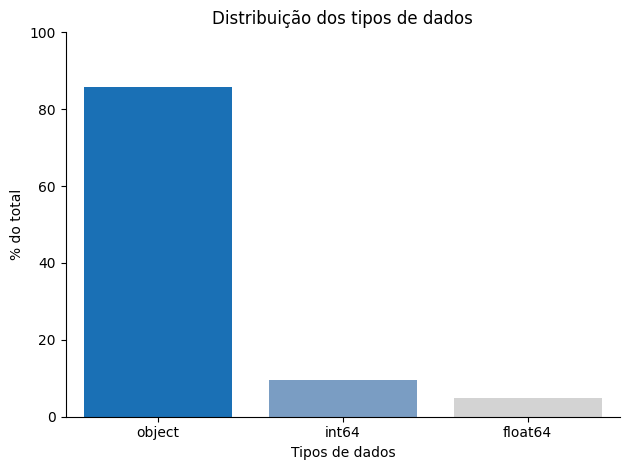

In [ ]:
fig, ax = plt.subplots()
data = (df_churn.dtypes.value_counts(normalize=True)*100).round(2)
sns.barplot(x=data.index.astype(str), y=data.values, palette=['#0073CF', "#6E9CCF",  "#D3D3D3"])
plt.title('Distribuição dos tipos de dados')
plt.xlabel('Tipos de dados')
plt.ylabel('% do total')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0, 100)
plt.tight_layout()

Com base nas informações fornecidas, podemos observar que:

* é possivel indentificar que a variavel `churn` é o nosso atributo target.

* Iremos ver mais à frente, apesar de não termos detectado nenhum valor ausente, existem algumas strings que representam sim valores ausentes.

* A coluna `customerID` representa um identificador único para cada cliente, o que significa que não contém informações relevantes que possam ser usadas como características preditivas em nosso modelo de machine learning. Portanto, na fase de pré-processamento de dados, iremos realizar a  exclusão dessa variável para melhorar a qualidade dos dados que serão usados na construção do modelo.

* A maioria dos dados em nosso dataset é do tipo `Object` (85.71%), seguido por `Int64` (9.52%) e `Float64` (4.76%). Na etapa de pré-processamento de dados, as variáveis que são categorias (ou seja, que possuem o tipo object) precisam ser codificadas em valores numéricos, incluindo a variável target.

* Além disso, Observamos que a coluna `TotalCharges` que é o valor total cobrado do cliente durante seu tempo, possui o tipo incorreto (`object`), o tipo apropriado para esta variável é `float64`. O mesmo se aplica a variavel `SeniorCitizen` que indica se o cliente é idoso ou não, trata-se de uma variável categórica. Vamos realizar as correções dessas inconsistências nesta etapa.


Aplicando a transformação na variável SeniorCitizen, mapeando os valores numéricos 0 e 1 para as categorias 'No' e 'Yes'.

In [ ]:
df_churn['SeniorCitizen'] = df_churn['SeniorCitizen'].map({0:'No', 1:'Yes'}).copy()

Ao trabalhar com a coluna chamada `TotalCharges`, percebemos que havia um problema na conversão das strings para números. Isso ocorreu porque algumas células que deveriam conter valores estavam vazias, mas foram preenchidas com a string `""`. Quando tentamos converter essa string vazia para um número, o interpretador retorna um erro.

Para solucionar essa situação, adotamos um procedimento de identificar as linhas contendo valores não numéricos. Nesse caso, substituímos esses valores por NaN e extraímos os índices das linhas afetadas. Em seguida, substituímos os valores NaN pela mediana da variável `TotalCharges`. Essa abordagem permitiu contornar a presença de valores ausentes e manter a integridade dos dados para análise.

In [ ]:
index_TotalCharges = df_churn.TotalCharges.index.values
index_not_numeric = df_churn.index[pd.to_numeric(df_churn.TotalCharges, errors='coerce').isna()].values
median_TotalCharges = df_churn.loc[np.setdiff1d(index_TotalCharges, index_not_numeric),
                            df_churn.columns == 'TotalCharges'].astype('float64').median()
df_churn.loc[index_not_numeric, 'TotalCharges'] = median_TotalCharges[0]
df_churn['TotalCharges'] = df_churn['TotalCharges'].astype('float64')

### **2. O dataset está balanceado?**

Quando se trata de classificação Binaria, uma das questões mais importantes a serem consideradas é se o conjunto de dados em questão está balanceado ou não. A distribuição dos dados pode ter um grande impacto no desempenho do modelo, e o desequilíbrio dos dados é um problema comum em muitos conjuntos de dados.

% de Clientes que não cancelaram o serviço: 0.7346
% de Clientes que cancelaram o serviço: 0.2654



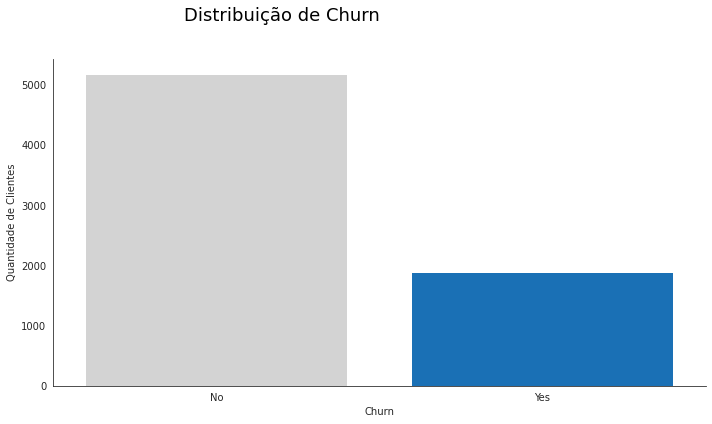

In [ ]:
proportion = df_churn.Churn.value_counts(normalize=True).values
fig, ax = plt.subplots(figsize=(10, 6), dpi=72)
sns.set_style("white")
sns.countplot(data=df_churn, x='Churn', palette=["#D3D3D3", '#0073CF'], linewidth=0, edgecolor="none", ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(-0.1, 6000, 'Distribuição de Churn', fontsize=18, fontweight='medium', va='bottom', color='black')
ax.set_ylabel('Quantidade de Clientes')
ax.set_xlabel('Churn')
print(f'% de Clientes que não cancelaram o serviço: {proportion[0].round(4)}')
print(f'% de Clientes que cancelaram o serviço: {proportion[1].round(4)}\n')
plt.tight_layout()

* Ao analisarmos o gráfico de distribuição de churn, é possível notar que a maioria dos clientes - cerca de 73,46% do total, representando 5.174 pessoas - permaneceram com o serviço, enquanto apenas 26,54% dos clientes (ou 1.869 pessoas) optaram por cancelá-lo. Esses números revelam uma grande disparidade entre as duas categorias.

Para identificar se os nossos dados podem estar com algum tipo de bias (viés), irei verificar a contagem de valores para `Male` e `Female`.

Abaixo, você pode ver que o gênero das entradas está balanceado.

% de Clientes do genero Masculino: 50.48
% de Clientes do genero Feminino: 49.52 



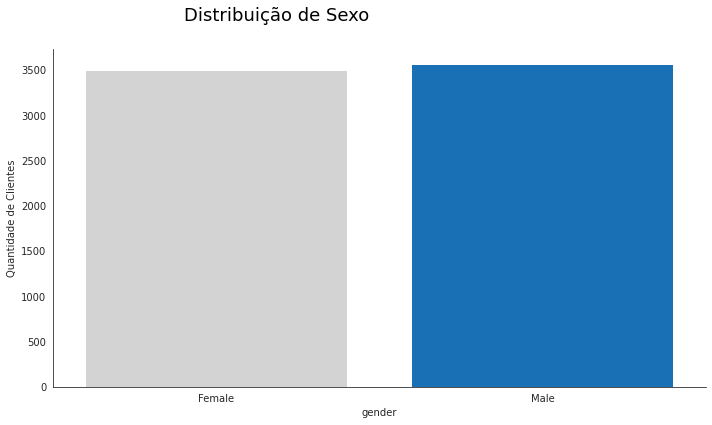

In [ ]:
male = (df_churn.gender.value_counts(normalize=True)*100).round(2)[0]
female = (df_churn.gender.value_counts(normalize=True)*100).round(2)[1]
fig, ax = plt.subplots(figsize=(10, 6), dpi=72)
sns.set_style("white")
sns.countplot(data=df_churn, x='gender', palette=["#D3D3D3", '#0073CF'], linewidth=0, edgecolor="none", ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(-0.1, 4000, 'Distribuição de Sexo', fontsize=18, fontweight='medium', va='bottom', color='black')
ax.set_ylabel('Quantidade de Clientes')
print(f'% de Clientes do genero Masculino: {male}\n% de Clientes do genero Feminino: {female} \n')
plt.tight_layout()

na etapa de pré-processamento de dados iremos lidar com essa desproporção e garantir que o modelo de machine learning seja capaz de aprender corretamente com as duas classes.

### **3. Qual é o montante de receita perdida devido à taxa de churn dos clientes?**

Existem diferentes maneiras de medir a taxa de churn em uma empresa. Além do churn rate, que representa a taxa de cancelamentos em um período pré-determinado, existe também o churn de receita (também chamado de Revenue churn), que mede o total de receita perdida devido a esses cancelamentos.

$$\text{Churn de receita (%)} = \frac{\text{Receita perdida de clientes antigos}}{\text{Receita total no período}} \times 100\%$$


Para empresas com um portfólio variado de produtos, o churn de receita é uma métrica útil para identificar possíveis problemas em um serviço específico e encontrar pontos de melhoria para reverter a situação. Além disso, é um indicador efetivo para avaliar a sustentabilidade do negócio a longo prazo.


Churn de receita: 17.81%



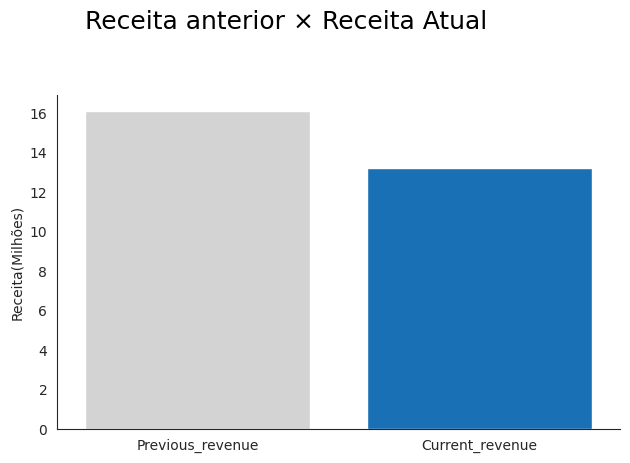

In [ ]:
churn_revenue = df_churn.TotalCharges.loc[df_churn.Churn == 'Yes'].sum()
current_revenue = df_churn.TotalCharges.loc[df_churn.Churn == 'No'].sum()
previous_revenue = df_churn.TotalCharges.sum()
df = pd.DataFrame(np.array([(previous_revenue/1000000).round(3), (current_revenue/1000000).round(3)]).reshape(1, -1), columns=['Previous_revenue', 'Current_revenue'])
fig, ax = plt.subplots()
sns.barplot(data=df, ax=ax, palette=["#D3D3D3", '#0073CF'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(-0.4, 20, 'Receita anterior × Receita Atual', fontsize=18, fontweight='medium', va='bottom', color='black')
ax.set_ylabel('Receita(Milhões)')
print(f'Churn de receita: {((churn_revenue/previous_revenue)*100).round(2)}%\n')
plt.tight_layout()

* Constatou-se que 26.54% dos clientes da empresa de telecomunicações cancelaram o serviço, o que gerou uma perda de receita significativa de 17.81%, correspondente a 2.863 milhões de reais. Essa queda na receita é refletida no gráfico acima, que ilustra claramente a diferença entre a receita total no período anterior, estimada em cerca de 16.072 milhões de reais, e a receita atual, que é de 13.209 milhões de reais.


### **4. Qual o tipo de distribuição das variáveis?**



Em um conjunto de dados é importante descrever o comportamento de como os valores estão distribuídos,
<br>usaremos o histograma para identificar a distribuição das variáveis numéricas.

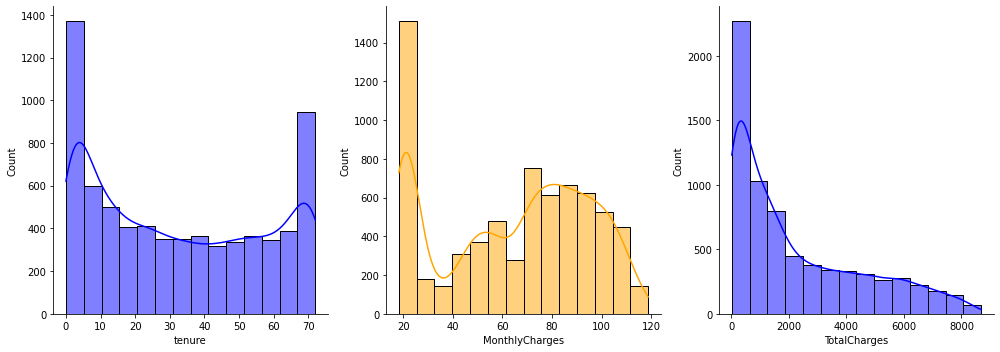

In [ ]:
def custom_histplot(data, columns, colors, grid_shape=(2, 3), figsize=(14, 5), dpi=72):
    n_rows, n_cols = grid_shape
    fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize, dpi=dpi)
    axes = ax.flatten()

    for axis, column, color in zip(axes, columns, colors):
        sns.histplot(data=data, x=column, color=color, ax=axis, kde=True, bins='sturges')
        axis.spines['right'].set_visible(False)
        axis.spines['top'].set_visible(False)

    for remaining_ax in axes[len(columns):]:
        remaining_ax.set_visible(False)

    return plt.tight_layout()

custom_histplot(data=df_churn, columns=['tenure','MonthlyCharges', 'TotalCharges'],
                colors=['blue', 'orange', 'blue'], grid_shape=(1, 3))

### **5. Há *outliers* presentes?**


**<h4> Método do Intervalo Interquartil (IQR)</h4>**

O intervalo interquartil (IQR) é uma medida de dispersão que indica a amplitude do intervalo central de 50% dos dados. Ele é calculado subtraindo-se o primeiro quartil (Q1) do terceiro quartil (Q3).
A fórmula para calcular o IQR é:

$$\text{IQR} = Q3 - Q1$$

Utilizando o IQR, podemos identificar outliers com base nos limites inferior e superior, que são definidos como:

$$\text{Limite Inferior} = Q1 - 1.5 \times \text{IQR}$$
$$\text{Limite Superior} = Q3 + 1.5 \times \text{IQR}$$

Os valores que estão fora desse intervalo são considerados outliers.

Especificamente:

* Um valor é considerado um outlier inferior se for menor que o Limite Inferior.
* Um valor é considerado um outlier superior se for maior que o Limite Superior.







A seguir, criarei uma função chamada `detect_outliers_iqr` que utiliza o método do intervalo interquartil (IQR). Esta função será aplicada às variáveis numéricas `MonthlyCharge`, `TotalCharges` e `tenure`.


In [ ]:
def detect_outliers_iqr(data):
    Q1 = np.nanpercentile(data, 25)
    Q3 = np.nanpercentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    n_outliers = ((data < lower_bound) | (data > upper_bound))
    return n_outliers

aqui, irei aplicar a função `detect_outliers_iqr` e, em seguida, imprimir a quantidade de outliers encontrados em cada coluna

In [ ]:
for column in ['MonthlyCharges', 'TotalCharges','tenure']:
    result = detect_outliers_iqr(df_churn[column])
    print("No outliers found." if result.sum()== 0 else result.sum())

No outliers found.
No outliers found.
No outliers found.


Podemos constatar que as nossas variaveis numericas não possuem outliers detectáveis pelo método do IQR.

A análise do boxplot para as colunas MonthlyCharges, TotalCharges e tenure reforça essa hipótese. O boxplot utiliza os quartis e a amplitude interquartil (IQR) para determinar os limites além dos quais os dados são considerados outliers.

In [ ]:
def custom_boxplot(data, columns, colors, grid_shape=(2, 3), figsize=(14, 8), dpi=72):
    n_rows, n_cols = grid_shape
    fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize, dpi=dpi)
    axes = ax.flatten()

    for axis, column, color in zip(axes, columns, colors):
        sns.boxplot(data=data, x=column, color=color, ax=axis)
        axis.spines['right'].set_visible(False)
        axis.spines['top'].set_visible(False)

    for remaining_ax in axes[len(columns):]:
        remaining_ax.set_visible(False)

    return plt.tight_layout()

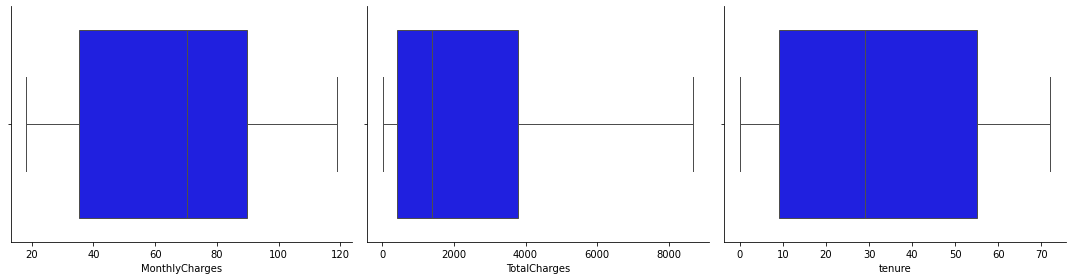

In [ ]:
custom_boxplot(data=df_churn, colors=['blue', 'blue', 'blue'],
               columns=['MonthlyCharges', 'TotalCharges','tenure'],
               grid_shape=(1, 3),figsize=(15, 4))

* Durante a análise, não foram encontradas anomalias (outliers) que pudessem afetar a confiabilidade dos resultados obtidos.

### **6. Qual a correlação existente entre as variáveis?**

A correlação é uma medida que descreve a direção e a intensidade da relação entre duas ou mais variáveis. Para determinar as correlações existentes entre as variáveis de interesse, é comum gerar uma matriz de correlação. Essa matriz é composta por coeficientes de correlação que indicam a força e a direção da relação entre cada par de variáveis.

In [ ]:
columns_numeric = df_churn.select_dtypes(include=[np.number])
corr = columns_numeric.corr().copy()
corr.style.background_gradient(cmap='PuBuGn')

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825464
MonthlyCharges,0.247900,1.000000,0.650864
TotalCharges,0.825464,0.650864,1.000000


Com base na matriz de correlação, é possível observar que existem associações significativas entre algumas das variáveis.

* Por exemplo, há uma forte associação positiva entre as variáveis ``tenure`` e ``TotalCharges``, com uma correlação de 82%. Em média, os clientes que permanecem mais tempo na empresa de telecomunicações (tenure maior) tendem a ter um valor total cobrado mais alto (TotalCharges). No entanto, é preciso lembrar que correlação não implica causalidade, ou seja, não podemos afirmar que o aumento do tempo de permanência seja a única causa do aumento do valor total cobrado pelo serviço.

* O mesmo se aplica à correlação de 65% entre as variáveis ``MonthlyCharges`` e ``TotalCharges``, indicando uma forte relação positiva entre elas.
Isso representa que, em geral, à medida que o valor mensal cobrado do cliente aumenta, o valor total cobrado pelo serviço também tende a aumentar.


##  Pré-processamento de dados

Com base nos resultados da análise exploratória, podemos direcionar nossos esforços para o pré-processamento dos dados. Essa etapa inclui uma série de atividades que têm como objetivo preparar os dados para modelagem, tornando-os mais adequados para uso em modelos e algoritmos. As atividades que realizamos incluem limpeza dos dados, remoção de valores ausentes, padronização, normalização, codificação de variáveis e inclui a divisão dos dados em conjuntos de treinamento e teste.

In [ ]:
!pip install category-encoders
from sklearn.model_selection import train_test_split
from category_encoders.one_hot import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC

### **Separando entre Treino e Teste**
A separação de dados em treino e teste é um processo importante em machine learning. O objetivo é dividir os dados em dois conjuntos: um para treinar o modelo e outro para testá-lo. Isso é feito para evitar que o modelo seja treinado de forma a se adaptar apenas aos dados de treino, o que pode levar a problemas como overfitting.


* Aproveitando e excluíndo a coluna customerID, é uma variavel desnecessária ao longo de todo este projeto, devido não ter importancia preditiva para nosso modelo

In [ ]:
df_churn.drop(columns=['customerID'], inplace=True)
df_churn.Churn = df_churn['Churn'].map({'No':0, 'Yes':1}).copy()
features = df_churn.drop(columns='Churn').copy()
target = df_churn.Churn.copy()
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0,shuffle=True)

**Conjunto de Treino**

O conjunto de dados de treinamento é utilizado para treinar o modelo, desenvolver o pipeline de processamento dos dados e criar nossa baseline. Esta baseline será usada como referência para selecionar o modelo que será otimizado.

In [ ]:
print(f'X_train: shape:{X_train.shape}')
print(f'y_train: shape:{y_train.shape}')

X_train: shape:(5634, 19)
y_train: shape:(5634,)


**Conjunto de Teste**

Esse conjunto é utilizado apenas no final, com o seu modelo pronto, e otimizado, para testar o resultado do modelo pronto com dados novos, da mesma forma que ele receberá esses dados no mundo real.

In [ ]:
print(f'X_test: shape:{X_test.shape}')
print(f'y_test: shape:{y_test.shape}')

X_test: shape:(1409, 19)
y_test: shape:(1409,)


### **Balanceamento dos dados - SMOTENC**

O balanceamento de dados é uma técnica importante em machine learning, especialmente quando lidamos com conjuntos de dados desbalanceados, onde uma classe tem muito mais exemplos do que a outra. Isso pode causar problemas ao modelo, pois ele tende a se ajustar à classe majoritária e não reflete a realidade.

Uma técnica avançada para balancear dados é o **SMOTENC (Synthetic Minority Over-sampling Technique for imbalanced data with categorical variables)**.
Ele é uma extensão do algoritmo SMOTE, que gera dados sintéticos da classe minoritária, mas trata os dados categóricos de forma diferente. Isso é especialmente útil quando o conjunto de dados contém tanto variáveis numéricas quanto categóricas
























* Usando a biblioteca imblearn é possível aplicar facilmente técnicas de balanceamento de dados.

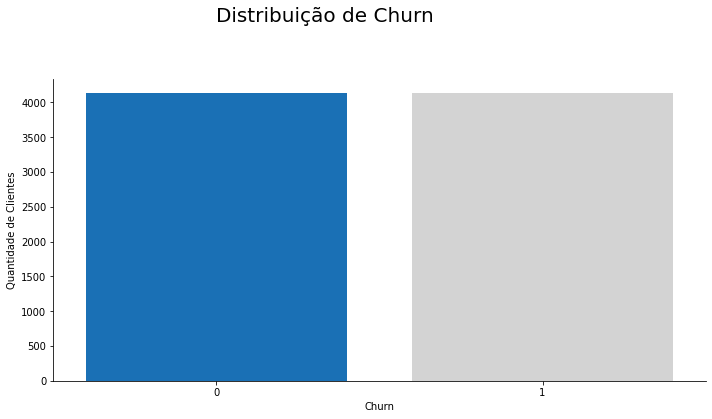

In [ ]:
cat_cols = [X_train[col].dtype == 'object' for col in X_train.columns]
smotenc = SMOTENC(categorical_features=cat_cols,sampling_strategy='minority', random_state=42)
X_train_smotenc, y_train_smotenc = smotenc.fit_resample(X_train, y_train)
fig, ax = plt.subplots(figsize=(10, 6), dpi=72)
sns.set_style("white")
sns.countplot(x=y_train_smotenc, palette=['#0073CF', "#D3D3D3"], linewidth=0, edgecolor="none", ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(-0, 5100, 'Distribuição de Churn' ,
        fontsize=20, fontweight='medium',va='bottom', color='black')
ax.set_ylabel('Quantidade de Clientes')
ax.set_xlabel('Churn')
plt.tight_layout()

### **Codificação de variáveis categóricas - One-Hot Encoder**

Na análise exploratoria de dados, é comum trabalhar com variáveis ​​categóricas, que representam características qualitativas de um conjunto de dados. No entanto, muitos algoritmos de Machine learning exigem que os dados de entrada sejam numéricos. É necessário converter essas variáveis ​​categóricas em um formato numérico, preservando as informações originais.

One-Hot Encoder é uma técnica de pré-processamento que é usada para converter variáveis categóricas em vetores binários. Ele cria um novo recurso para cada categoria única e atribui um valor binário (1 ou 0) para cada recurso, indicando se a amostra tem ou não a categoria correspondente. Essa técnica é útil quando não há ordem natural nas categorias e todas as categorias são igualmente importantes.

Aqui, Utilizei a classe OneHotEncoder da biblioteca category_encoders para realizar a codificação one-hot da variáveis categóricas presente no conjunto de dados de treinamento.

In [ ]:
cols_to_encode = X_train_smotenc.select_dtypes(include='object').columns.copy()
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_enc = encoder.fit_transform(X_train_smotenc[cols_to_encode].copy())
X_train_enc.reset_index(inplace=True)
X_train_enc.drop(columns='index', inplace=True)

### **Padronização de dados - Standard Scaler**

A padronização de dados consiste na transformação de variáveis numéricas para uma escala comum. O objetivo é normalizar as escalas das variáveis, evitando que qualquer uma delas exerça influência excessiva sobre os modelos.

Uma das técnicas para dimensionar dados é o `StandardScaler`, que padroniza as características removendo a média e escalando para a variância unitária. Isto significa que cada característica do conjunto de dados será transformada para ter uma média igual a zero e um desvio padrão igual a um.

* A fórmula utilizada pelo `StandardScaler` é:

##$$z = \frac{x - \mu}{\sigma}$$##

- $z$ é o valor padronizado
- $x$ é o valor original
- $\mu$ é a média dos dados
- $\sigma$ é o desvio padrão dos dados


In [ ]:
cols_to_scale = X_train_smotenc.select_dtypes(include='number').columns.copy()
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train_smotenc[cols_to_scale].copy())

Em seguida, concatenarei os dados categóricos previamente codificados (X_train_enc) com os dados escalonados (X_train_scaler) em um único DataFrame.

In [ ]:
X_train_transform = pd.DataFrame(X_train_scaler, columns=X_train_smotenc[cols_to_scale].columns)
X_train_transform = pd.concat([X_train_enc, X_train_transform], axis=1).copy()
X_train_transform.head()

,gender_1,gender_2,SeniorCitizen_1,SeniorCitizen_2,Partner_1,Partner_2,Dependents_1,Dependents_2,PhoneService_1,PhoneService_2,...,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,0,0,1.861389,0.597136,1.902123
1,1,0,0,1,0,1,1,0,0,1,...,0,0,1,0,1,0,0,-0.562977,-0.760000,-0.626773
2,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,1.819589,-1.518245,-0.101940
3,0,1,1,0,1,0,0,1,1,0,...,1,0,1,1,0,0,0,0.231212,0.204880,0.172274
4,1,0,1,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0.816403,1.075198,1.154114


Com os dados devidamente transformados e sem a necessidade de ajustes adicionais, é possível iniciar a modelagem de Machine Learning.

##  Modelagem de Machine Learning

Depois do pré-processamento de dados, o próximo passo é a criação do modelo. Isso envolve a escolha dos algoritmos de Machine learning mais adequado para o problema e a definição dos parâmetros dos modelos.

In [ ]:
!pip install scikit-learn scikit-optimize
from sklearn.model_selection import cross_val_score
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.base import clone
import warnings

### **Modelo Baseline de desempenho dos Modelos**

O modelo baseline é um modelo simples que nos ajuda a entender o mínimo de desempenho que podemos esperar. Ele serve como uma linha de base para medir o desempenho de modelos mais complexos que desenvolveremos posteriormente.

Irei usar a cross-validation para estimar o erro da baseline dos modelos iniciais.  A métrica utilizada para avaliação será `Recall`. Os dados de treinamento utilizados estão desbalanceados e não foram submetidos a qualquer otimização.

A seguir,  criei um pré-processador usando ColumnTransformer para aplicar diferentes transformações às colunas. As colunas categoricas serão codificada com `OneHotEncoder`, enquanto as colunas numéricas serão escaladas com `StandardScaler`.

In [ ]:
preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(),cols_to_encode),
            ('num', StandardScaler(),cols_to_scale)])

O modelo `RandomForest` esta sendo utilizado como baseline de desempenho para os demais modelos que iremos testar.

In [ ]:
pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier())])

scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='recall')
print(f'Recall: {np.mean(scores)}')
print(f'Deviation: {np.std(scores)}')

Recall: 0.5023443708609272
Deviation: 0.028823668965223623


###**Teste de Performance dos Modelos**



Irei aplicar a validação cruzada a vários modelos, buscando aquele que tem o melhor recall na predição de casos de rotatividade de clientes. Novamente, serão utilizados apenas dados de treino. Os modelos escolhidos são:

* Stochastic Gradient Descent
* Adaboost
* XGboost
* LightGBM

Desenvolvi uma função de validação cruzada personalizada para comparar modelos. Essa função realiza a validação cruzada utilizando `StratifiedKFold` para garantir a representatividade das classes em cada split. O `SMOTENC` é usado para balancear as classes nos dados de treinamento.

A criação de uma função específica, em vez de usar uma pronta, visa garantir que a distribuição dos splits de validação permaneça inalterada,
 mantendo a representatividade do mundo real.


In [ ]:
def cross_validation(estimator, X, y, preprocessor, bool_category, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
    smote = SMOTENC(categorical_features=bool_category,sampling_strategy='minority', random_state=42)
    recall_scores = []

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        X_smote, y_smote = smote.fit_resample(X_train, y_train)
        pipeline = Pipeline(steps=[
              ('preprocessor', preprocessor),
              ('estimator', clone(estimator))
          ])
        pipeline.fit(X_smote, y_smote)
        y_pred = pipeline.predict(X_val)
        recall = recall_score(y_val, y_pred)
        recall_scores.append(recall)

    return recall_scores

A seguir, com o objetivo de avaliar o desempenho dos modelos de machine learning, estou utilizando a validação cruzada para cada modelo, armazenando os nomes e as pontuações de Recall em listas. Em seguida, essas listas são convertidas em um DataFrame do pandas que organiza as pontuações dos modelos em uma tabela para uma análise mais fácil e comparativa.

In [ ]:
xgb = XGBClassifier()
adb = AdaBoostClassifier()
sgd = SGDClassifier()
lgbm = LGBMClassifier()

scores = []
models = []
for clf in (adb, sgd, xgb, lgbm):
    model_name = clf.__class__.__name__
    score = cross_validation(clf, X_train, y_train,
                              preprocessor=preprocessor, bool_category=cat_cols,
                              n_splits=10)
    models.append(model_name)
    scores.append(score)

df_classifier = pd.DataFrame(scores, index=models).T

* Antes de iniciar a análise dos resultados dos modelos, vamos examinar nosso dataset verificando as cinco primeiras entradas.

In [ ]:
df_classifier.head()

,AdaBoostClassifier,SGDClassifier,XGBClassifier,LGBMClassifier
0,0.746667,0.740000,0.586667,0.606667
1,0.746667,0.720000,0.586667,0.593333
2,0.766667,0.840000,0.633333,0.660000
3,0.814570,0.735099,0.655629,0.721854
4,0.766667,0.666667,0.620000,0.660000


* Com o método `describe`, geraremos estatísticas para os nossos modelos, a fim de compreender melhor seu desempenho

In [ ]:
df_classifier.describe()

,AdaBoostClassifier,SGDClassifier,XGBClassifier,LGBMClassifier
count,10.000000,10.000000,10.000000,10.000000
mean,0.760790,0.739510,0.612896,0.644852
std,0.025128,0.075767,0.025840,0.036274
min,0.720000,0.613333,0.573333,0.593333
25%,0.746667,0.680000,0.590000,0.620000
50%,0.760000,0.737550,0.616667,0.646667
75%,0.766667,0.790000,0.631667,0.660000
max,0.814570,0.840000,0.655629,0.721854


* O modelo `AdaBoostClassifier` possui a maior média de recall (0.7608), seguido pelo `SGDClassifier` (0.7395). Quando se trata de variabilidade, ou seja, a consistência dos modelos em resultados médios, o `AdaBoostClassifier` apresenta a menor variabilidade entre eles, com um desvio padrão de apenas **0.0251**. Por outro lado, o `SGDClassifier` exibe a maior variabilidade, com um desvio padrão de **0.0758**.

* Em termos de desempenho médio, o modelo `AdaBoostClassifier` parece ser o modelo mais promissor.

Abaixo, utilizarei o histograma para identificar a distribuição dos dados dos modelos classificadores.

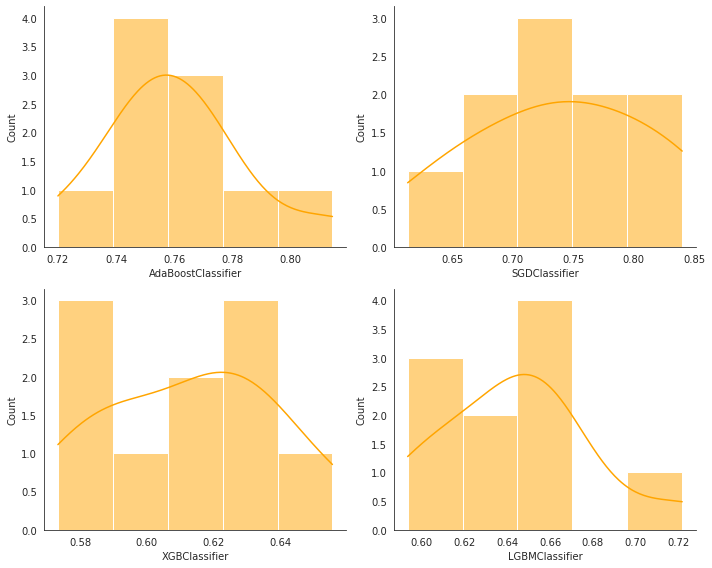

In [ ]:
custom_histplot(df_classifier, df_classifier.columns,colors=['orange']*4, figsize=(10, 8), grid_shape=(2, 2))

Ao analisarmos os histogramas das distribuições de dados para os classificadores, podemos constatar que:

* Os classificadores `AdaBoostClassifier` e `LGBMClassifier`, apresentam distribuições com uma leve assimetria à direita. a maior parte dos valores de desempenho(recall) são agrupados em um intervalo específico, próximo ao centro da distribuição. Contudo, também há valores mais altos que se destacam, possivelmente sendo outliers.

* Já os modelos `SGDClassifier` e o `XGBClassifier` tem distribuições mais simetricas, evidenciando estabilidade na distribuição.

* Para identificar possíveis outliers na distribuição de dados dos modelos classificadores, usarei o boxplot.

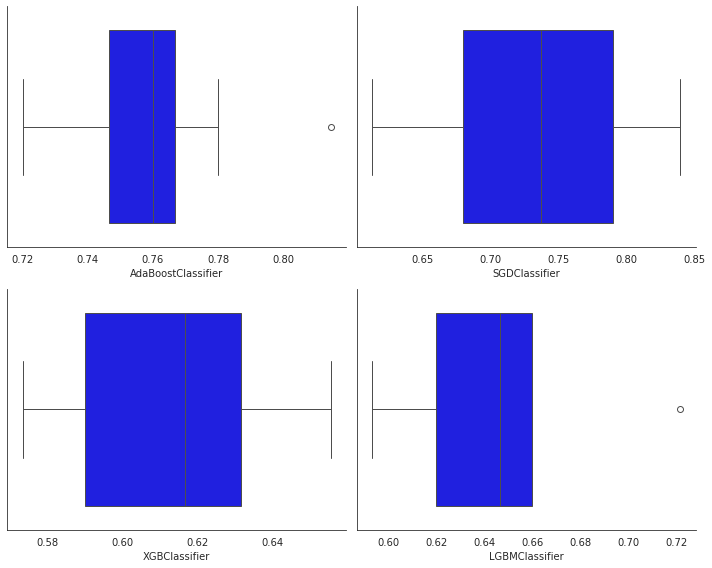

In [ ]:
custom_boxplot(df_classifier, df_classifier.columns,colors=['blue']*4, grid_shape=(2, 2), figsize=(10, 8))

* Analisando o boxplot, observamos que os modelos `AdaBoostClassifier` e `LGBMClassifier` apresentam outliers, corroborando a hipótese levantada na análise dos histogramas. Em contrapartida, os modelos `SGDClassifier` e `XGBClassifier` não exibem valores discrepantes.

A tabela abaixo apresenta uma análise detalhada do recall dos modelos de classificação utilizando várias métricas estatísticas. Para cada modelo, foram realizados os seguintes testes e análises:

* **Teste de Shapiro-Wilk**: O teste de Shapiro-Wilk é um método estatístico utilizado para verificar se uma amostra de dados segue uma distribuição normal. A hipótese nula do teste de Shapiro-Wilk é que a amostra segue uma distribuição normal, enquanto a hipótese alternativa é que a amostra não segue uma distribuição normal. O teste calcula um valor-W, que é comparado a um valor crítico tabelado, para determinar se a hipótese nula deve ser rejeitada ou não.

$$W = \frac{(\sum_{i=1}^{n} a_i x_{(i)})^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$
Onde:
* $W$ é o valor do teste de Shapiro-Wilk
* $x_{(i)}$ são os valores da amostra ordenados de forma crescente
* $\bar{x}$ é a média da amostra
* $a_i$ são constantes tabeladas, dependentes do tamanho da amostra

In [ ]:
def shapiro_test(data):
  stat, p_value = shapiro(data)
  return np.round(p_value, 4)

* **Teste de D'Agostino-Pearson**: é um teste de normalidade que avalia se a forma da distribuição de uma variável aleatória é semelhante à forma da distribuição normal. Ele combina os testes de assimetria (skewness) e curtose para verificar se os valores de assimetria e curtose da amostra são compatíveis com os de uma distribuição normal

$$K^2 = Z_1^2 + Z_2^2$$

Onde:

* $K^2$ é a estatística do teste de D'Agostino-Pearson
* $Z_1$ é o valor padronizado do coeficiente de assimetria
* $Z_2$ é o valor padronizado do coeficiente de curtose

In [ ]:
def dagostino_pearson_test(data):
    filterwarnings("ignore", message="kurtosistest only valid for n>=20")
    statistic, p_value = normaltest(data)
    return np.round(p_value, 4)

* **Intervalo de Confiança - Distribuição t de Student:**: O intervalo de confiança é uma ferramenta estatística utilizada para estimar o valor de um parâmetro populacional, como a média ou a proporção, com base em uma amostra. Quando a variância populacional é desconhecida, a distribuição t de Student é utilizada para calcular o intervalo de confiança.

  $$\bar{x} \pm t_{\alpha/2, n-1} \frac{s}{\sqrt{n}}$$
  
Onde:

* $\bar{x}$ é a média da amostra
* $t_{\alpha/2, n-1}$ é o valor crítico da distribuição t de Student com nível de significância $\alpha$ e $n-1$ graus de liberdade
* $s$ é o desvio padrão da amostra
* $n$ é o tamanho da amostra

In [ ]:
def confidence_interval(data, confidence=0.95):
   mean = np.mean(data)
   standard_error = sem(data)
   degrees_of_freedom = len(data) - 1
   lower_bound, upper_bound = t.interval(confidence=confidence, df=degrees_of_freedom, loc=mean, scale=standard_error)
   return f'{lower_bound.round(4)} - {upper_bound.round(4)}'

Logo abaixo,é possível visualizar a tabela com os resultados das métricas anteriores para cada modelo de classificação. Foi incluída também a identificação de outliers utilizando o método IQR como métrica.

In [ ]:
classifiers = df_classifier.columns
shapiro_tests = [shapiro_test(df_classifier[column].values) for column in classifiers]
dagostino_tests = [dagostino_pearson_test(df_classifier[column].values) for column in classifiers]
outliers = [detect_outliers_iqr(df_classifier[column].values).sum() for column in classifiers]
confidence_intervals = [confidence_interval(df_classifier[column].values) for column in classifiers]
df_stats = pd.DataFrame({'Classifiers': classifiers,'Shapiro-Wilk test': shapiro_tests,
                         " D'Agostino-Pearson test": dagostino_tests,'Outliers': outliers,
                         'Confidence interval (95%)': confidence_intervals})

table = GT(df_stats).tab_header(title="Statistical Performance of Classification Models").cols_align(align="center")
table.tab_style(style=style.text(align="center"), locations=loc.body())

GT(_tbl_data=          Classifiers  Shapiro-Wilk test   D'Agostino-Pearson test  Outliers  \
0  AdaBoostClassifier             0.3999                    0.2057         1   
1       SGDClassifier             0.6921                    0.8084         0   
2       XGBClassifier             0.8303                    0.8473         0   
3      LGBMClassifier             0.3415                    0.3071         1   

  Confidence interval (95%)  
0           0.7428 - 0.7788  
1           0.6853 - 0.7937  
2           0.5944 - 0.6314  
3           0.6189 - 0.6708  , _body=<great_tables._gt_data.Body object at 0x7f576cba5720>, _boxhead=Boxhead([ColInfo(var='Classifiers', type=<ColInfoTypeEnum.default: 1>, column_label='Classifiers', column_align='center', column_width=None), ColInfo(var='Shapiro-Wilk test', type=<ColInfoTypeEnum.default: 1>, column_label='Shapiro-Wilk test', column_align='center', column_width=None), ColInfo(var=" D'Agostino-Pearson test", type=<ColInfoTypeEnum.default: 1>, column_label=" D'Agostino-Pearson test", column_align='center', column_width=None), ColInfo(var='Outliers', type=<ColInfoTypeEnum.default: 1>, column_label='Outliers', column_align='center', column_width=None), ColInfo(var='Confidence interval (95%)', type=<ColInfoTypeEnum.default: 1>, column_label='Confidence interval (95%)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7f577b0f5510>, _spanners=Spanners([]), _heading=Heading(title='Statistical Performance of Classification Models', subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[StyleInfo(locname=LocBody(columns=None, rows=None), grpname=None, colname='Classifiers', rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None), grpname=None, colname='Classifiers', rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None), grpname=None, colname='Classifiers', rownum=2, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None), grpname=None, colname='Classifiers', rownum=3, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None), grpname=None, colname='Shapiro-Wilk test', rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None), grpname=None, colname='Shapiro-Wilk test', rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None), grpname=None, colname='Shapiro-Wilk test', rownum=2, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None), grpname=None, colname='Shapiro-Wilk test', rownum=3, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None),

* Os classificadores não rejeitam a hipotese nula nos testes de normalidade de Shapiro-Wilk e D'Agostino-Pearson ou seja, seguem uma distribuição normal.

* Conforme observado anteriormente no boxplot, os modelos`AdaBoostClassifier` e `LGBMClassifier` exibem valores discrepantes.

* Analisando os  intervalos de confiança, destacam-se os modelos classificadores `AdaBoostClassifier` e `XGBClassifier`, com amplitudes de intervalo de 0.036 e 0.037, são o  grupo de menor variabilidade entre os seus intervalos respectivamente.

####**Aplicando o  teste de Kruskal-Wallis**

O teste de Kruskal-Wallis é um teste estatístico não paramétrico utilizado para comparar três ou mais amostras independentes. Ele é baseado na classificação (ranking) dos dados. Ele compara as medianas de k amostras independentes, sendo k ≥ 3. A hipótese nula (H0) assume que que as medianas de todas as amostras são iguais, ou seja, não há diferença estatisticamente significativa entre os grupos.
 A hipótese alternativa (H1) assume que  pelo menos uma das medianas das amostras é diferente das outras, indicando que há pelo menos uma diferença estatisticamente significativa entre os grupos.

 O teste de Kruskal-Wallis é uma alternativa não paramétrica à análise de variância (ANOVA) de um fator quando os pressupostos desta última não são atendidos, como a normalidade e homogeneidade de variâncias.

 \begin{align*}
H &= \frac{12}{N(N+1)} \sum_{j=1}^k \frac{R_j^2}{n_j} - 3(N+1)
\end{align*}

Onde:
* $N$ é o número total de observações
* $n_j$ é o tamanho da j-ésima amostra
* $R_j$ é a soma dos postos (ranks) da j-ésima amostra
* $\sum_{j=1}^k$ representa o somatório das $k$ amostras

A seguir, irei aplicar o teste de Kruskal-Wallis para verificar se existe alguma diferença estatisticamente significativa entre os valores de recall dos diferentes modelos de classificação.

In [ ]:
def kruskal_wallis_test(*groups, alpha=0.05):
    statistic, p_value = kruskal(*groups)
    return p_value

adaboost_group = df_classifier.AdaBoostClassifier.values
xgb_group = df_classifier.XGBClassifier.values
lgbm_group = df_classifier.LGBMClassifier.values
sgd_group = df_classifier.SGDClassifier.values


result = kruskal_wallis_test(adaboost_group,
                             xgb_group, adaboost_group,
                             sgd_group, lgbm_group)

print(f'P-Value: {result}')

P-Value: 1.233385330962489e-06


* Dado que o valor-p é é extremamente pequeno ($1.233\times 10^{-6}$)sendo menor que 0,05, rejeitamos a hipótese nula. Isso indica que há uma diferença significativa nos valores de recall entre pelo menos um dos modelos de classificação.

#### **Aplicando o teste Post-Hoc de Dunn**

Após a realização do teste de Kruskal-Wallis, que indica se há diferença significativa entre os grupos comparados, é comum aplicar um teste de post-hoc para determinar quais pares de grupos específicos diferem entre si. Um dos testes de post-hoc mais utilizados nesse contexto é o teste de Dunn.

O teste de Dunn é um teste não paramétrico que compara os postos médios de cada par de grupos. Ele calcula a diferença entre os postos médios de cada par e verifica se essa diferença é estatisticamente significativa, levando em consideração o número de comparações realizadas.

A fórmula para calcular a estatística do teste de Dunn é:
$$Z = \frac{R_i - R_j}{\sqrt{\frac{N(N+1)}{12}\left(\frac{1}{n_i} + \frac{1}{n_j}\right)}}$$

Onde:
* $R_i$ e $R_j$ são os postos médios dos grupos $i$ e $j$.
* $N$ é o número total de observações.
* $n_i$ e $n_j$ são os tamanhos das amostras dos grupos $i$ e $j$.

Em seguida, aplicarei o teste de Dunn para determinar quais modelos classificadores apresentam diferenças significativas entre si.

In [ ]:
def dunn_test(df, val_col, group_col):
    dunn_result = sp.posthoc_dunn(df, val_col=val_col, group_col=group_col, p_adjust='bonferroni')
    return dunn_result

df_long = df_classifier.melt(var_name='Classifier', value_name='Score').copy()
result = dunn_test(df_long, val_col='Score', group_col='Classifier')
result.style.applymap(lambda val: 'color: dodgerblue' if val < 0.05 else 'color: black')

,AdaBoostClassifier,LGBMClassifier,SGDClassifier,XGBClassifier
AdaBoostClassifier,1.000000,0.007273,1.000000,0.000053
LGBMClassifier,0.007273,1.000000,0.061758,1.000000
SGDClassifier,1.000000,0.061758,1.000000,0.000971
XGBClassifier,0.000053,1.000000,0.000971,1.000000


* `AdaBoostClassifier` mostra diferenças significativas em relação a `LGBMClassifier` e `XGBClassifier`.

* `LGBMClassifier` é significativamente diferente apenas de `AdaBoostClassifier`.

* `SGDClassifier` é significativamente diferente de `XGBClassifier`.

* `XGBClassifier` tem diferenças significativas com `AdaBoostClassifier` e `SGDClassifier`


### **Otimização dos Hiperparâmetro - Bayesian Optimization**

 A Otimização Bayesiana é um método que busca encontrar o conjunto de hiperparâmetros que maximiza a performance do modelo de forma eficiente. Ao contrário da random search ou de grid search, a Otimização Bayesiana usa um modelo probabilístico para selecionar os conjuntos de hiperparâmetros. O processo começa com a definição de uma função de aquisição, que decide quais hiperparâmetros testar em seguida, com base no modelo probabilístico. Um dos métodos mais comuns para a função de aquisição é a Expected Improvement (EI), que escolhe os hiperparâmetros que têm a maior expectativa de melhorar o desempenho em relação ao melhor resultado obtido até o momento. No python, uma das bibliotecas mais populares para realizar Otimização Bayesiana é o `Scikit-Optimize (skopt)`.

#### **AdaBoost (Adaptive Boosting)**

AdaBoost é um dos métodos mais populares de Boosting, conceito que se refere a combinação de diversos modelos de aprendizagem fracos para criar um modelo de aprendizagem forte. A principal ideia por trás do AdaBoost é ajustar adaptativamente os pesos dos exemplos de treinamento, focando nos exemplos que foram incorretamente classificados em iterações anteriores.

Utilizando a biblioteca skopt, criei um espaço de busca que inclui três hiperparâmetros importantes para o algoritmo AdaBoost:

* `n_estimators`: O número máximo de estimadores em que o boosting é encerrado.

* `algorithm`: Especifica qual variante do algoritmo AdaBoost será utilizada.

* `learning_rate`: Peso aplicado a cada classificador em cada iteração de reforço.



In [ ]:
ada_space = [
    Integer(10, 500, name='n_estimators'),
    Categorical(['SAMME', 'SAMME.R'], name='algorithm'),
    Real(1e-6, 1e-1, prior='log-uniform', name='learning_rate')
]

Aqui, criei uma função chamada `ada_objective` que será usada para avaliar o desempenho do modelo AdaBoost em relação aos hiperparâmetros que estão sendo otimizados.

In [ ]:
@use_named_args(ada_space)
def ada_objective(**params):
    model = AdaBoostClassifier(**params)
    scores = cross_validation(X=X_train, y=y_train, estimator=model,
                              preprocessor=preprocessor, bool_category=cat_cols, n_splits=5)
    return np.mean(scores)

A seguir, irei executar o processo de otimização bayesiana para ajustar os hiperparâmetros do AdaBoost.

In [ ]:
ada_result = gp_minimize(ada_objective, ada_space,n_calls=80,random_state=0, n_random_starts=10)
print(f'Best hyperparameters {ada_result.x}')
print(f'Best RMSE {ada_result.fun}')

Best hyperparameters [425, 'SAMME.R', 8.354270566129826e-05]
Best RMSE 0.8933909191583611


Os resultados da otimização revelaram que os hiperparâmetros selecionados, com `n_estimators` de 425, `algorithm` SAMME.R, e uma `learning_rate` de 8.35e-05, alcançaram um recall de 0.893

####**Stochastic Gradient Descent (SGD)**

Stochastic Gradient Descent (SGD) é um algoritmo de otimização amplamente utilizado em Machine Learning. Ele é uma variante do método de gradiente descendente (GD) que atualiza os parâmetros de um modelo de forma iterativa para minimizar uma função de custo. Ao contrário do GD tradicional, que calcula o gradiente da função de custo utilizando todo o conjunto de dados de treinamento, o SGD atualiza os parâmetros com base em um único exemplo de treinamento ou um pequeno mini-lote.

Utilizando a biblioteca skopt, definimos um espaço de busca que inclui cinco hiperparâmetros importantes para o algoritmo SGD:

* `alpha`: Constante que multiplica o termo de regularização.

* `penalty`: A penalidade (também conhecida como termo de regularização) a ser usada.

* `max_iter`: O número máximo de passagens sobre os dados de treinamento (também conhecidos como épocas).

* `learning_rate`: Taxa de aprendizagem.

* `eta0` : A taxa de aprendizado inicial para os cronogramas 'constant', 'invscaling' ou 'adaptive'



In [ ]:
sgd_space = [
    Real(1e-6, 1e-2, prior='log-uniform', name='alpha'),
    Categorical(['l2', 'l1', 'elasticnet'], name='penalty'),
    Integer(1000, 5000, name='max_iter'),
    Categorical(['constant', 'optimal', 'invscaling', 'adaptive'], name='learning_rate'),
    Real(0.0001, 1.0, name='eta0')
]

Aqui, criei uma função chamada `sgd_objective` que será usada para avaliar o desempenho do modelo SGD em relação aos hiperparâmetros que estão sendo otimizados.

In [ ]:
@use_named_args(sgd_space)
def sgd_objective(**params):
    model = SGDClassifier(**params)
    scores = cross_validation(X=X_train, y=y_train, estimator=model,
                              preprocessor=preprocessor, bool_category=cat_cols, n_splits=5)
    return - np.mean(scores)

A seguir, irei executar o processo de otimização bayesiana para ajustar os hiperparâmetros do SGD.

In [ ]:
sgd_result = gp_minimize(sgd_objective, sgd_space,verbose=1,n_calls=80,random_state=0, n_random_starts=10)
print(f'Best hyperparameters {sgd_result.x}')
print(f'Best RMSE {-sgd_result.fun}')

Best hyperparameters [0.0017776560138603548, 'l2', 3616, 'invscaling', 0.0001]
Best RMSE 0.8867464008859358


A otimização revelou que os hiperparâmetros selecionados com `alpha` de **0.0017**, `penalty` configurado como **l2**, `max_iter` igual a **3616** , `learning_rate` definido como **invscaling** e `eta0` de **0,0001** conseguiram atingir um Recall de **0,886**.

####**LightGBM(Light Gradient Boosting Machine)**

Light GBM, abreviação de Light Gradient Boosting Machine, é uma implementação de alto desempenho, distribuída e de código aberto do framework gradient boosting. Foi desenvolvido pela Microsoft e é projetado para treinamento eficiente e distribuído em conjuntos de dados muito grandes. Ele é uma implementação eficiente do algoritmo de gradient boosting. O Light GBM se destaca devido à sua abordagem única para construir árvores de decisão. Diferentemente dos métodos tradicionais de aumento de gradiente, que usam crescimento de árvore em profundidade, o Light GBM emprega uma estratégia de crescimento de árvore folha a folha.

Utilizando a biblioteca skopt, definimos um espaço de busca que inclui seis hiperparâmetros importantes para o algoritmo LightGBM:

* `num_leaves`: Máximo de folhas de árvore para aprendizes base.

* `min_child_samples`: Número mínimo de dados necessários em um filho (folha).

* `learning_rate`: Taxa de aprendizado.

* `subsample`: Proporção de subamostragem da instância de treinamento.

* `colsample_bytree`: Proporção de subamostragem de colunas ao construir cada árvore.

* `n_estimators`: Número de árvores impulsionadas para ajustar.


In [ ]:
lgbm_space  = [
    Integer(2, 128, name='num_leaves'),
    Integer(1, 100, name='min_child_samples'),
    Real(1e-3, 1e-1, prior='log-uniform', name='learning_rate'),
    Real(0.05, 1.0, name='subsample'),
    Real(0.05, 1.0, name='colsample_bytree'),
    Integer(100, 1000, name='n_estimators'),
]

Aqui, criei uma função chamada `lgbm_objective` que será usada para avaliar o desempenho do modelo LGBM em relação aos hiperparâmetros que estão sendo otimizados.

In [ ]:
@use_named_args(lgbm_space)
def lgbm_objective(**params):
    model = LGBMClassifier(**params)
    scores = cross_validation(X=X_train, y=y_train, estimator=model,
                              preprocessor=preprocessor, bool_category=cat_cols, n_splits=5)
    return - np.mean(scores)

A seguir, irei executar o processo de otimização bayesiana para ajustar os hiperparâmetros do LGBM.

In [ ]:
lgbm_result = gp_minimize(lgbm_objective, lgbm_space,n_calls=80, random_state=0, n_random_starts=10)
print(f'Best hyperparameters {lgbm_result.x}')
print(f'Best RMSE {-lgbm_result.fun}')

Best hyperparameters [2, 100, 0.001, 0.05, 0.8506362371846301, 385]
Best RMSE 0.8933909191583611


A otimização revelou que os hiperparâmetros selecionados com `num_leaves` de **2**, `min_child_samples` de **100**, `learning_rate` de **0,001**, `subsample` de **0,05**, `colsample_bytree` de **0,8506** e `n_estimators` de **385** conseguiram alcançar um Recall de **0,893**.

####**XGBoost(eXtreme Gradient Boosting)**

eXtreme Gradient Boosting (XGBoost) é uma implementação escalável e altamente precisa de aumento de gradiente que expande os limites do poder de computação para algoritmos de árvore aumentada, sendo construído em grande parte para energizar o desempenho do modelo de aprendizado de máquina e a velocidade computacional. Com o XGBoost, as árvores são construídas em paralelo, em vez de sequencialmente como o GBDT. Ele segue uma estratégia de nível, escaneando valores de gradiente e usando essas somas parciais para avaliar a qualidade das divisões em cada divisão possível no conjunto de treinamento.

Utilizando a biblioteca skopt, definimos um espaço de busca que inclui cinco hiperparâmetros importantes para o algoritmo XGBoost:

* `learning_rate`:Taxa de aprendizado do modelo.

* `n_estimators`: Número de árvores de decisão.

* `max_depth`: Profundidade máxima de cada árvore de decisão.

* `min_child_weight`: Soma mínima do peso da instância (hessian) necessária em um nó filho.

* `gamma`: Redução mínima de perda necessária para fazer uma partição adicional em um nó folha da árvore.


In [ ]:
xgb_space = [
    Real(0.0001, 1.0, name='learning_rate', prior='log-uniform'),
    Integer(100, 500, name='n_estimators'),
    Integer(1, 10, name='max_depth'),
    Integer(1, 10, name='min_child_weight'),
    Real(0.1, 1.0, name='gamma', prior='uniform')
]

Aqui, criei uma função chamada `xgb_objective` que será usada para avaliar o desempenho do modelo XGBoost em relação aos hiperparâmetros que estão sendo otimizados.

In [ ]:
@use_named_args(xgb_space)
def xgb_objective(**params):
    model = XGBClassifier(**params)
    scores = cross_validation(X=X_train, y=y_train, estimator=model,
                              preprocessor=preprocessor, bool_category=cat_cols, n_splits=5)
    return - np.mean(scores)

A seguir, irei executar o processo de otimização bayesiana para ajustar os hiperparâmetros do XGBoost.



In [ ]:
xgb_result = gp_minimize(xgb_objective, xgb_space,n_calls=80,random_state=0, n_random_starts=10)
print(f'Best hyperparameters {xgb_result.x}')
print(f'Best RMSE {-xgb_result.fun}')

Best hyperparameters [0.0003036601824788995, 261, 1, 3, 0.5257648608970887]
Best RMSE 0.8933909191583611


A otimização revelou que os hiperparâmetros selecionados com um `learning_rate` de **0,0003**, `n_estimators` de **261**, `max_depth` de **1**, `min_child_weight` de **3** e `gamma` de **0,5257** conseguiram alcançar um Recall de **0,893**.

## Avaliar o desempenho do modelo
A avaliação é a etapa onde testamos se nosso modelo é capaz de cumprir a missão que foi definida para ele. É nessa fase que utilizamos diferentes métricas e técnicas para avaliar a eficácia do modelo em relação aos dados de teste. Mas não é só isso! Também avaliamos se o modelo é capaz de lidar com novos dados que não foram usados no treinamento e se ele é robusto o suficiente para lidar com diferentes cenários e variações.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from joblib import dump, load

No início do projeto, dividimos os dados em dois conjuntos: um de treino e outro de teste. Agora que já exploramos, preparamos os dados e otimizamos os hiperparâmetros, é hora de avaliar o potencial do modelo com os dados de teste. No entanto, para que os resultados sejam justos, é necessário garantir que os novos dados estejam nas mesmas condições dos dados de treinamento, aos quais aplicamos as transformações.

In [ ]:
X_test_enc = encoder.transform(X_test[cols_to_encode].copy())
X_test_enc.reset_index(inplace=True)
X_test_enc.drop(columns='index', inplace=True)
X_test_scaler = scaler.transform(X_test[cols_to_scale].copy())
X_test_transform = pd.DataFrame(X_test_scaler, columns=X_test[cols_to_scale].columns)
X_test_transform = pd.concat([X_test_enc, X_test_transform], axis=1)
X_test_transform.head()

,gender_1,gender_2,SeniorCitizen_1,SeniorCitizen_2,Partner_1,Partner_2,Dependents_1,Dependents_2,PhoneService_1,PhoneService_2,...,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,1,1,0,1,0,...,1,1,0,0,1,0,0,-0.353980,-0.344985,-0.454935
1,0,1,1,0,0,1,1,0,1,0,...,1,0,1,0,0,0,1,1.359796,1.700355,2.314527
2,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,-0.604777,0.136581,-0.510930
3,0,1,1,0,0,1,1,0,1,0,...,0,1,0,1,0,0,0,-1.106370,-1.667101,-0.927624
4,1,0,1,0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,1.150799,0.339714,1.030822


### **Avaliação de Desempenho do Modelo AdaBoost**
utilizaremos os hiperparâmetros otimizados anteriormente para treinar o modelo AdaBoost. Em seguida, avaliaremos seu desempenho preditivo nos dados de teste, utilizando o Recall como a métrica principal. Outras métricas, como Accuracy e AUC, serão utilizadas como suporte para uma avaliação mais abrangente.

In [ ]:
ada_params ={'n_estimators':425, 'algorithm':'SAMME.R',
             'learning_rate':8.354270566129826e-05,'random_state':0}
ada_model = AdaBoostClassifier(**ada_params)
ada_model.fit(X_train_transform, y_train_smotenc)
y_pred_ada = ada_model.predict(X_test_transform)
y_pred_proba_ada = ada_model.predict_proba(X_test_transform)[:, 1]
roc_auc_ada = roc_auc_score(y_test, y_pred_proba_ada)
print(classification_report(y_test, y_pred_ada))
print(f"ROC AUC (AdaBoost): {roc_auc_ada}")

              precision    recall  f1-score   support

           0       0.92      0.57      0.70      1041
           1       0.41      0.85      0.56       368

    accuracy                           0.64      1409
   macro avg       0.66      0.71      0.63      1409
weighted avg       0.78      0.64      0.66      1409

ROC AUC (AdaBoost): 0.7114527210458172


Abaixo, iremos gerar uma matriz de confusão para visualizar o desempenho do modelo de AdaBoost. A matriz de confusão nos permite observar a distribuição das previsões corretas e incorretas feitas pelo modelo, mostrando a relação entre os rótulos reais e os previstos

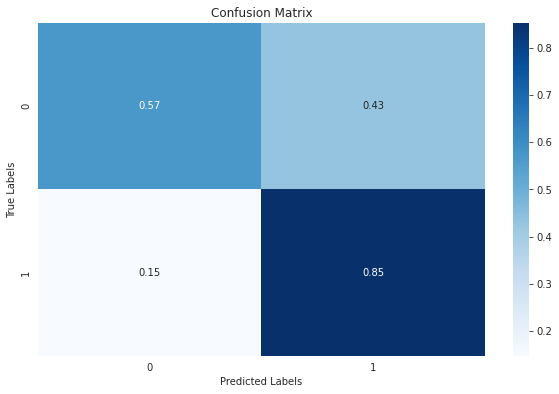

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=72)
sns.heatmap(confusion_matrix(y_test, y_pred_ada, normalize='true'), annot=True, fmt='.2f', cmap='Blues')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

* O modelo AdaBoost demonstrou um bom desempenho em identificar a maioria dos clientes que realmente vão cancelar o serviço, obtendo um Recall de 0.85 para essa classe.

* A acurácia do modelo AdaBoost foi de 0.64. Podemos concluir que o desempenho do modelo nesse aspecto é moderado em geral.

* O modelo AdaBoost obteve uma AUC de 0.71. A capacidade do modelo de distinguir entre clientes que cancelam e aqueles que permanecem é razoável, mas não excepcional.

### **Avaliação de Desempenho do modelo SGD**

Utilizaremos os hiperparâmetros otimizados anteriormente para treinar o modelo SGD. Em seguida, avaliaremos seu desempenho preditivo nos dados de teste, utilizando o Recall como a métrica principal. Outras métricas, como Accuracy e AUC, serão utilizadas como suporte para uma avaliação mais abrangente.

In [ ]:
sgd_params ={'alpha':0.0017776560138603548, 'penalty':'l2',
             'max_iter':3616, 'learning_rate':'invscaling',
             'eta0':0.0001, 'random_state':0}
sgd_model = SGDClassifier(**sgd_params)
sgd_model.fit(X_train_transform, y_train_smotenc)
y_pred_sgd = sgd_model.predict(X_test_transform)
y_pred_proba_sgd = sgd_model.decision_function(X_test_transform)
roc_auc_sgd = roc_auc_score(y_test, y_pred_proba_sgd)
print(classification_report(y_test, y_pred_sgd))
print(f"ROC AUC (SGD): {roc_auc_sgd}")

              precision    recall  f1-score   support

           0       0.92      0.57      0.71      1041
           1       0.42      0.86      0.56       368

    accuracy                           0.65      1409
   macro avg       0.67      0.72      0.63      1409
weighted avg       0.79      0.65      0.67      1409

ROC AUC (SGD): 0.8131630330367957


Abaixo, iremos gerar uma matriz de confusão para visualizar o desempenho do modelo de SGD. A matriz de confusão nos permite observar a distribuição das previsões corretas e incorretas feitas pelo modelo, mostrando a relação entre os rótulos reais e os previstos.

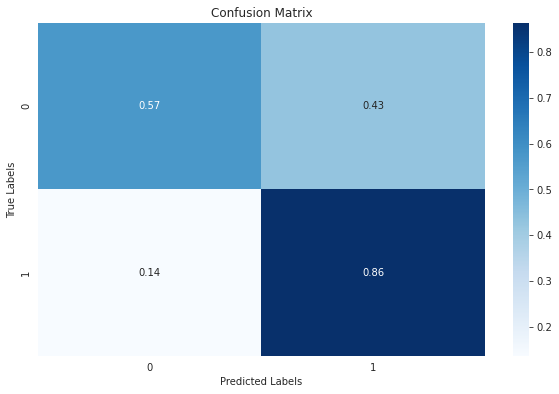

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=72)
sns.heatmap(confusion_matrix(y_test, y_pred_sgd, normalize='true'), annot=True, fmt='.2f', cmap='Blues')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

* Com um recall de 0,86, o modelo SGD demonstrou ser mais eficaz em identificar clientes que têm maior probabilidade de cancelar, em comparação com os outros modelos.

* Além disso, a acurácia do modelo também se destacou, alcançando um valor de 0,65, superior ao dos demais.

* Da mesma forma que ocorreu com o recall e a acurácia, o modelo SGD obteve o maior valor de AUC(0.81) entre os modelos, mostrando maior capacidade de discriminação entre as duas classes.

### **Avaliação de Desempenho do Modelo LightGBM**
utilizaremos os hiperparâmetros otimizados anteriormente para treinar o modelo LightGBM. Em seguida, avaliaremos seu desempenho preditivo nos dados de teste, utilizando o Recall como a métrica principal. Outras métricas, como Accuracy e AUC, serão utilizadas como suporte para uma avaliação mais abrangente

In [ ]:
lgbm_params ={'num_leaves':2,'min_child_samples':100,
              'learning_rate':0.001, 'subsample':0.05, 'random_state':0,
              'colsample_bytree':0.8506362371846301,'n_estimators':385, 'verbose':0}
lgbm_model = LGBMClassifier(**lgbm_params)
lgbm_model.fit(X_train_transform, y_train_smotenc)
y_pred_lgbm = lgbm_model.predict(X_test_transform)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_test_transform)[:, 1]
roc_auc_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)
print(classification_report(y_test, y_pred_lgbm))
print(f"ROC AUC (LightGBM): {roc_auc_lgbm}")

              precision    recall  f1-score   support

           0       0.92      0.57      0.70      1041
           1       0.41      0.85      0.56       368

    accuracy                           0.64      1409
   macro avg       0.66      0.71      0.63      1409
weighted avg       0.78      0.64      0.66      1409

ROC AUC (LightGBM): 0.7871520381739965


Abaixo, iremos gerar uma matriz de confusão para visualizar o desempenho do modelo de LightGBM. A matriz de confusão nos permite observar a distribuição das previsões corretas e incorretas feitas pelo modelo, mostrando a relação entre os rótulos reais e os previstos.

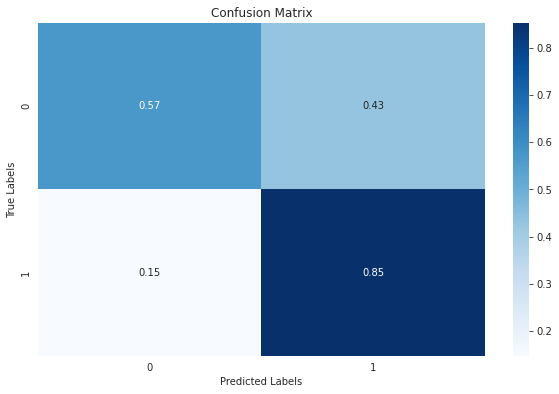

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=72)
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm, normalize='true'), annot=True, fmt='.2f', cmap='Blues')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

* O modelo LightGBM apresentou um recall de 0.85 para a classe de clientes que cancelam o serviço, desempenho semelhante ao do AdaBoost.

* A acurácia (0.64) também é igual à do modelo AdaBoost, refletindo um desempenho moderado.

* Com um AUC de 0.78, o LightGBM demonstra uma discriminação um pouco superior ao AdaBoost, mas ainda abaixo do nível alcançado pelo SGD.

### **Avaliação de Desempenho do modelo XGBoost**

Utilizaremos os hiperparâmetros otimizados anteriormente para treinar o modelo XGBoost. Em seguida, avaliaremos seu desempenho preditivo nos dados de teste, utilizando o Recall como a métrica principal. Outras métricas, como Accuracy e AUC, serão utilizadas como suporte para uma avaliação mais abrangente.

In [ ]:
xgb_params ={'learning_rate':0.0003036601824788995, 'n_estimators':261,
             'max_depth':1,'min_child_weight':3,'gamma':0.5257648608970887,
             'random_state':0}
xgb_model = XGBClassifier(**xgb_params)
xgb_model.fit(X_train_transform, y_train_smotenc)
y_pred_xgb = xgb_model.predict(X_test_transform)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_transform)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(classification_report(y_test, y_pred_xgb))
print(f"ROC AUC (XGB): {roc_auc_xgb}")

              precision    recall  f1-score   support

           0       0.92      0.57      0.70      1041
           1       0.41      0.85      0.56       368

    accuracy                           0.64      1409
   macro avg       0.66      0.71      0.63      1409
weighted avg       0.78      0.64      0.66      1409

ROC AUC (XGB): 0.7114527210458172


Abaixo, iremos gerar uma matriz de confusão para visualizar o desempenho do modelo de XGBoost. A matriz de confusão nos permite observar a distribuição das previsões corretas e incorretas feitas pelo modelo, mostrando a relação entre os rótulos reais e os previstos.

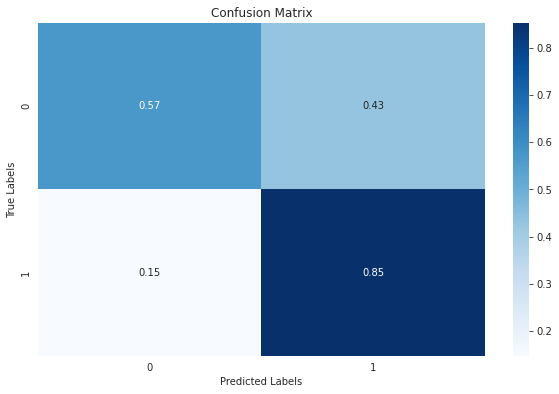

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=72)
sns.heatmap(confusion_matrix(y_test, y_pred_xgb, normalize='true'), annot=True, fmt='.2f', cmap='Blues')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

* Com um recall de 0,85, o modelo XGBoost mostrou a mesma capacidade que os modelos AdaBoost e LightGBM na identificação de clientes que cancelarão o serviço.

* Em termos de acurácia, também obteve um valor similar aos outros dois modelos, alcançando 0,64.

* Além disso, o XGBoost apresentou uma precisão de 0,71, semelhante ao AdaBoost.

###**Salvando o modelo**

O Nosso modelo já está treinado e pronto para fazer novas previsões. No entanto, ele ainda está "preso" ao kernel do Google Colab. Sempre que quisermos fazer uma previsão, imagine ter que executar todas as células novamente. Seria inviável! Para facilitar a exportação do modelo de machine learning utilizaremos a biblioteca `joblib`.

In [ ]:
dump(scaler, 'scaler.joblib')
dump(encoder, 'encoder.joblib')
dump(sgd_model, 'model.joblib')
dump(X_train_transform.columns.values, 'features.names')

['features.names']